# EDA on Telecom Customer Churn

## Importing the libraries

In [115]:
import numpy as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Dataset

In [116]:
df = pd.read_csv("Customer_Churn.csv")

In [117]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Column Descriptions

In [119]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- customerID – Unique identifier assigned to each customer.
- gender – Customer’s gender (Male/Female).
- SeniorCitizen – Indicates if the customer is a senior citizen (1 = Yes, 0 = No).
- Partner – Whether the customer has a spouse/partner (Yes/No).
- Dependents – Whether the customer has dependents (children or others) (Yes/No).
- tenure – Number of months the customer has stayed with the company.
- PhoneService – Whether the customer has a phone service (Yes/No).
- MultipleLines – If the customer has multiple phone lines (No phone service/No/Yes).
- InternetService – Type of internet service (DSL/Fiber optic/No).
- OnlineSecurity – Whether the customer has online security add-on (Yes/No/No internet service).
- OnlineBackup – Whether the customer has online backup add-on (Yes/No/No internet service).
- DeviceProtection – Whether the customer has device protection plan (Yes/No/No internet service).
- TechSupport – Whether the customer has technical support add-on (Yes/No/No internet service).
- StreamingTV – Whether the customer has streaming TV service (Yes/No/No internet service).
- StreamingMovies – Whether the customer has streaming movies service (Yes/No/No internet service).
- Contract – Customer’s contract type (Month-to-month/One year/Two year).
- PaperlessBilling – Whether the customer opts for paperless billing (Yes/No).
- PaymentMethod – Method used by customer to pay (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- MonthlyCharges – Amount charged to the customer every month.
- TotalCharges – Total amount charged to the customer over the entire tenure.
- Churn – Target variable: whether the customer left the service (Yes = churned, No = retained).

- Replacing blanks with 0 as tenure is 0 and no total charges are recorded 

In [120]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [122]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [123]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


- Check for duplicate values 

In [124]:
df["customerID"].duplicated().sum()

np.int64(0)

- Converted 0 and 1 values of SeniorCitizen to yes/no to make it easier to understand

In [125]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

- Displaying the count of churn using countplot

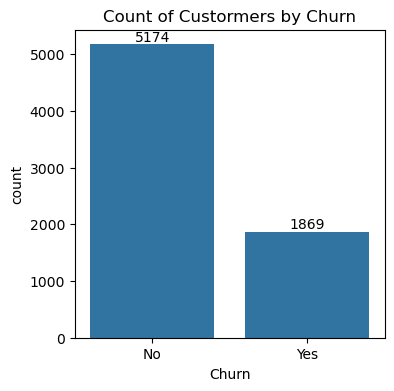

In [167]:
plt.figure(figsize = (4,4))
ax = sns.countplot(data = df, x = 'Churn')
ax.bar_label(ax.containers[0])     # To display the count
plt.title("Count of Custormers by Churn")
plt.show()

- Displaying the percentage of churn using piechart

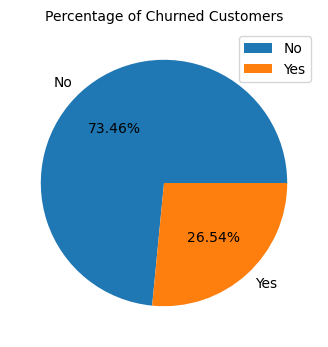

In [127]:
plt.figure(figsize = (4,4))
gb = df.groupby("Churn").agg({'Churn' : "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.legend()
plt.show()

- From the pie chart we can conclude that 26.54% of the customers have churned out.

- Checking the churn by gender using countplot

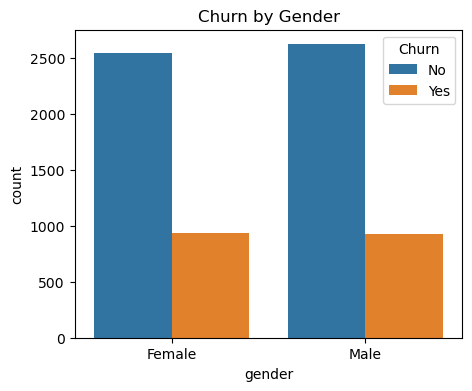

In [165]:
plt.figure(figsize = (5,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

- Finding the count of SeniorCitizen category using countplot

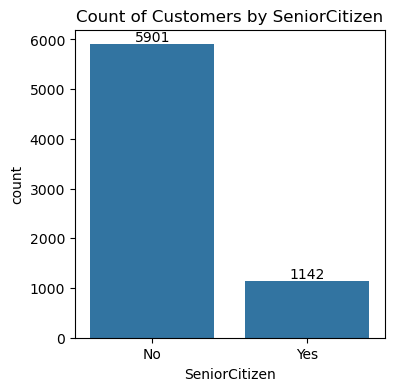

In [163]:
plt.figure(figsize = (4,4))
ax = sns.countplot(data = df, x = "SeniorCitizen")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by SeniorCitizen")
plt.show()

- Checking the churn in SeniorCitizen Category

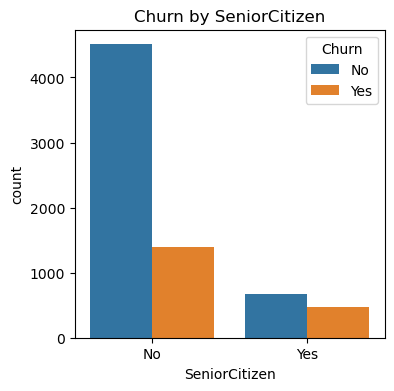

In [130]:
plt.figure(figsize = (4,4))
sns.countplot(data = df, x = "SeniorCitizen", hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

- We can clearly observe the churn in non SeniorCitizen category customers as the count of non SeniorCitizen category is more.
- But, for SeniorCitizen category we cannot clearly tell about the churn as the count of SeniorCitizen category is less.
- To overcome this we can use 100% stacked barplot to observe the churn in SeniorCitizen category

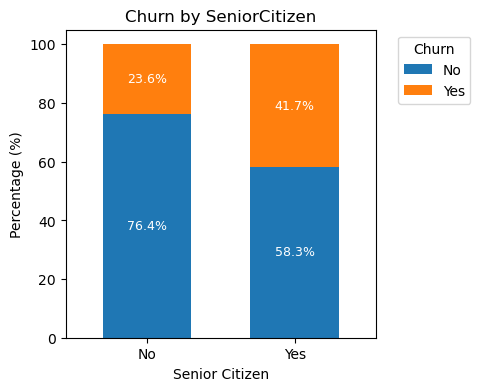

In [158]:
# Crosstab of counts
ct = pd.crosstab(df["SeniorCitizen"], df["Churn"])

# Convert to percentages
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = ct_percent.plot(kind="bar", stacked=True, figsize=(4,4), width = 0.6)  

plt.title("Churn by SeniorCitizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")

# Move legend outside
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")

# Fix x-axis labels
plt.xticks(rotation=0)

# Add percentage labels
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="center", color="white", fontsize=9)

plt.show()

- Comparatively a greater percentage of people in SeniorCitizen category have churn

- Checking weather the tenure affect the customer churn using histplot

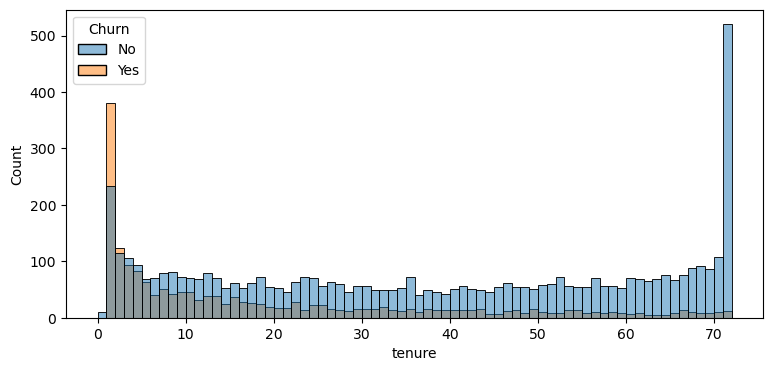

In [162]:
plt.figure(figsize = (9,4))
sns.histplot(data = df, x = "tenure", bins = 72, hue = "Churn")
plt.show()

- Poeple who have used the servies for longtime have stayed and people who have used the services for 1 or 2 months have churned

- Finding the Count of Customers by Contract

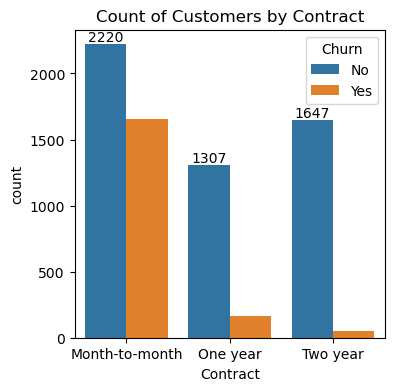

In [169]:
plt.figure(figsize = (4,4))
ax = sns.countplot(data = df, x = "Contract", hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

- By this we can say that the customers who have Month-to-month contract are likely to churn compared to the customers who have One year or Two year contract

- Finding the Customer Churn by Payment Method

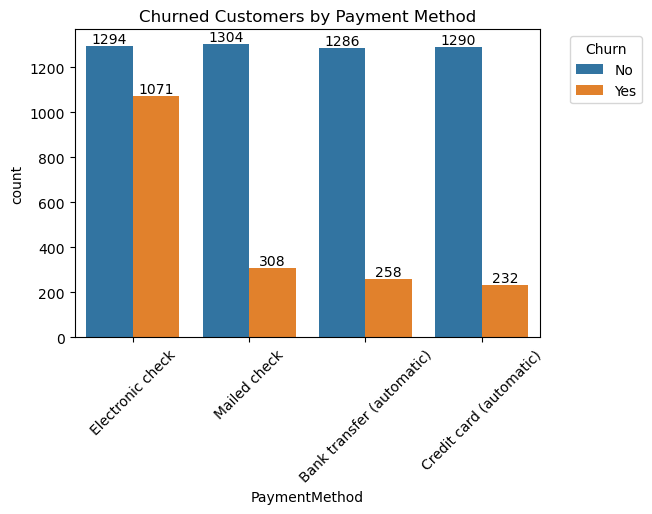

In [173]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation = 45)
plt.show()

- By the above plot we can say that the customers who are using electronic check payment method are churing more compared tho the customers who are using other payment methods